In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()

In [2]:
my_dir = "./data/"
fat_df = pd.read_csv(my_dir + "faturamento_lojas_atuais.csv")
lja_df = pd.read_csv(my_dir + "lojas_atuais.csv")
exp_df = pd.read_csv(my_dir + "cenarios_expansao.csv")

In [3]:
lja_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_loja       3130 non-null   int64  
 1   cod_ap         3130 non-null   int64  
 2   cod_municipio  3130 non-null   int64  
 3   feature_01     1171 non-null   object 
 4   feature_02     3130 non-null   object 
 5   feature_03     3130 non-null   bool   
 6   feature_04     3130 non-null   float64
 7   feature_05     3130 non-null   object 
 8   feature_06     3130 non-null   int64  
 9   feature_07     3130 non-null   float64
 10  feature_08     3130 non-null   float64
 11  feature_09     3130 non-null   float64
 12  feature_10     3130 non-null   float64
 13  feature_11     245 non-null    object 
 14  feature_12     245 non-null    object 
 15  feature_13     874 non-null    float64
 16  feature_14     874 non-null    float64
 17  feature_15     874 non-null    float64
 18  feature_

In [4]:
lja_df.feature_05.unique()
f01_counts = lja_df.feature_01.value_counts()
f02_counts = lja_df.feature_02.value_counts()
f05_counts = lja_df.feature_05.value_counts()
f11_counts = lja_df.feature_11.value_counts()
f12_counts = lja_df.feature_12.value_counts()

merge_df = lja_df.merge(fat_df)

In [5]:
merge_df["datetime"] = pd.to_datetime(merge_df.ano*100 + merge_df.mes, format='%Y%m')
q1 = [1, 2]
jf16_df = merge_df[merge_df.mes.isin(q1)]
jf16_df = jf16_df[jf16_df.ano == 2016]

In [6]:
rmjf16_df = jf16_df.groupby(['cod_loja', 'mes', 'ano'], as_index=False).sum()
rmjf16_df.cod_loja.unique()

lojas_sem_jf = []
for i in rmjf16_df["cod_loja"].unique():
    if rmjf16_df[rmjf16_df["cod_loja"] == i].shape[0] != 2:
        lojas_sem_jf.append(i)
    
str(len(lojas_sem_jf)) + " lojas sem jan e fev 2016"
rmjf16_df

,cod_loja,mes,ano,cod_ap,cod_municipio,feature_03,feature_04,feature_06,feature_07,feature_08,feature_09,feature_10,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,qtde,receita
0,1,1,2016,57757084070028,57757084,14,304.64,434,2.364901,2.347230,1623.423877,32.897497,0.0,0.0,0.0,0.0,0.0,0.0,13034.0,441833.37
1,1,2,2016,57757084070028,57757084,14,304.64,434,2.364901,2.347230,1623.423877,32.897497,0.0,0.0,0.0,0.0,0.0,0.0,11411.0,395340.22
2,2,1,2016,74201512070056,74201512,14,308.00,378,3.023537,2.762015,21877.447441,51.392363,0.0,0.0,0.0,0.0,0.0,0.0,1425.0,54660.39
3,2,2,2016,74201512070056,74201512,14,308.00,378,3.023537,2.762015,21877.447441,51.392363,0.0,0.0,0.0,0.0,0.0,0.0,1269.0,49120.72
4,3,1,2016,49704312070728,49704312,14,639.24,84,2.661431,2.507959,78314.676482,39.422368,0.0,0.0,0.0,0.0,0.0,0.0,4352.0,161428.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,3685,2,2016,57621256042028,57621256,0,616.56,98,3.176969,3.363542,236.074131,62.381642,1400.0,1001.0,1400.0,1400.0,1386.0,1332.8,4014.0,145430.99
6052,3686,1,2016,49135800042014,49135800,0,444.64,56,1.880951,1.904397,287.915674,55.061748,0.0,0.0,0.0,0.0,0.0,0.0,2603.0,85259.81
6053,3686,2,2016,49135800042014,49135800,0,444.64,56,1.880951,1.904397,287.915674,55.061748,0.0,0.0,0.0,0.0,0.0,0.0,1592.0,53781.67
6054,3687,1,2016,58963828014014,58963828,0,371.00,28,2.797963,2.709439,107.821558,62.363580,0.0,0.0,0.0,0.0,0.0,0.0,1530.0,48988.51


In [7]:
df = rmjf16_df[~rmjf16_df.cod_loja.isin(lojas_sem_jf).values]
df['jf_prop'] = df['receita'].pct_change()

<ipython-input-7-6134c30a8738>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jf_prop'] = df['receita'].pct_change()


In [8]:
rel_df = df[df['mes'] == 2][['cod_loja', 'jf_prop']]

In [9]:
rel_df = rel_df.merge(lja_df, on='cod_loja')[['cod_loja', 'jf_prop', 'feature_12']].dropna()

In [10]:
rel_df.feature_12.unique()

array(['FEATURE_12_VALUE_01', 'FEATURE_12_VALUE_02'], dtype=object)

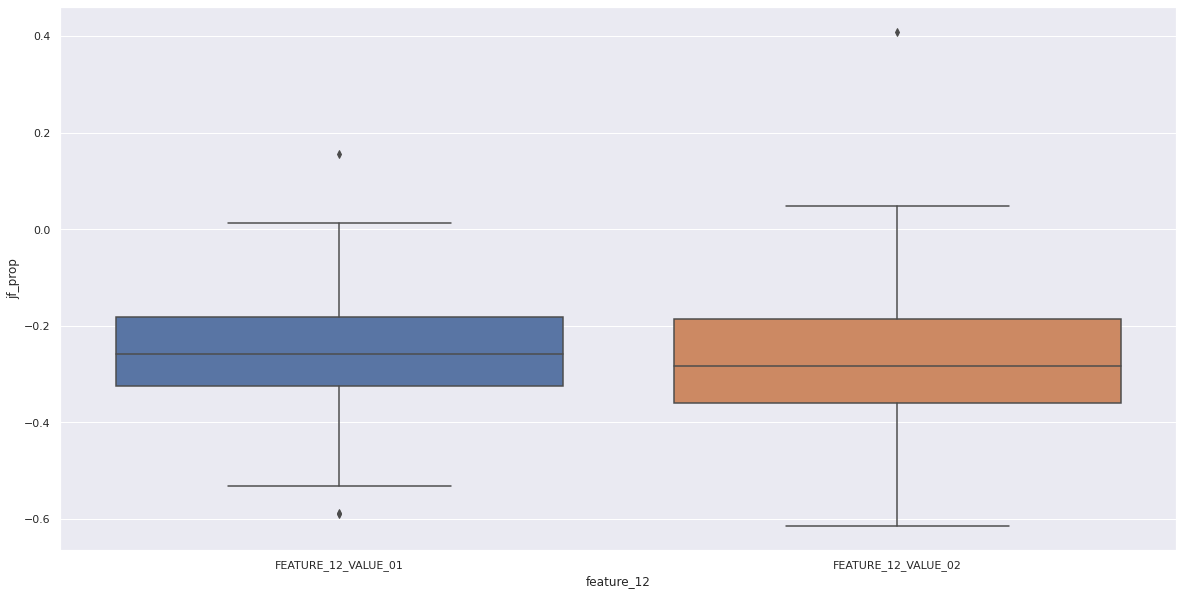

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(x=rel_df.feature_12, y=rel_df.jf_prop)

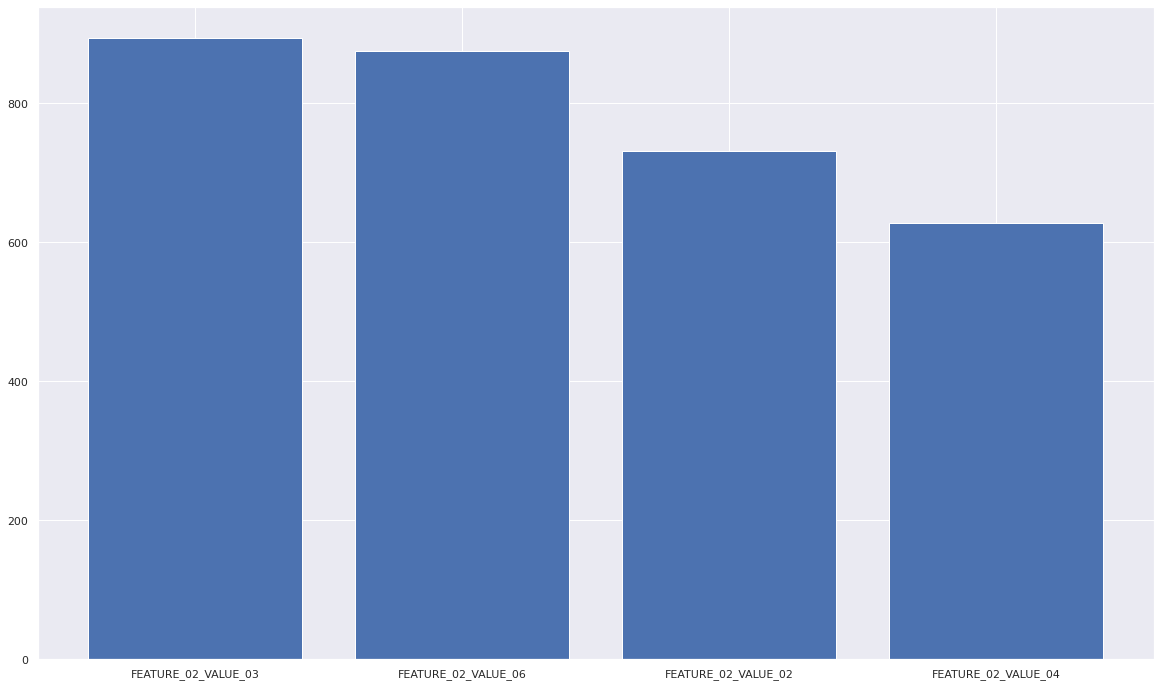

In [12]:
plt.figure(figsize=(20,12))
plt.bar(f02_counts.index, height=f02_counts)
plt.show()

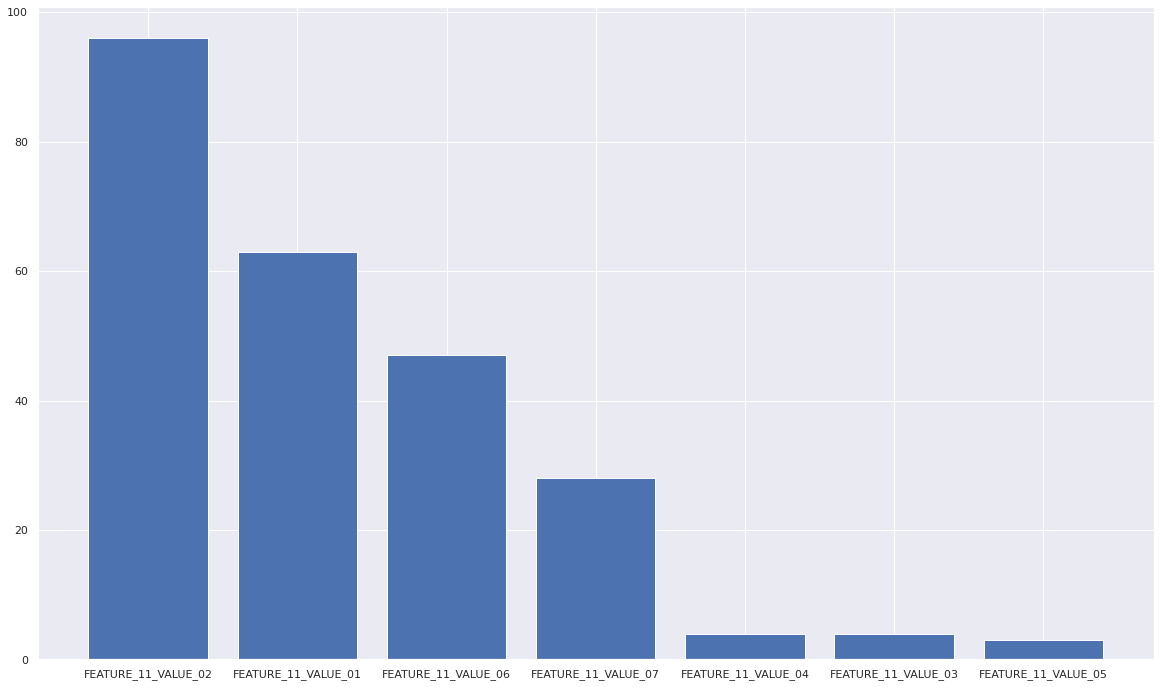

In [13]:
plt.figure(figsize=(20,12))
plt.bar(f11_counts.index, height=f11_counts)
plt.show()

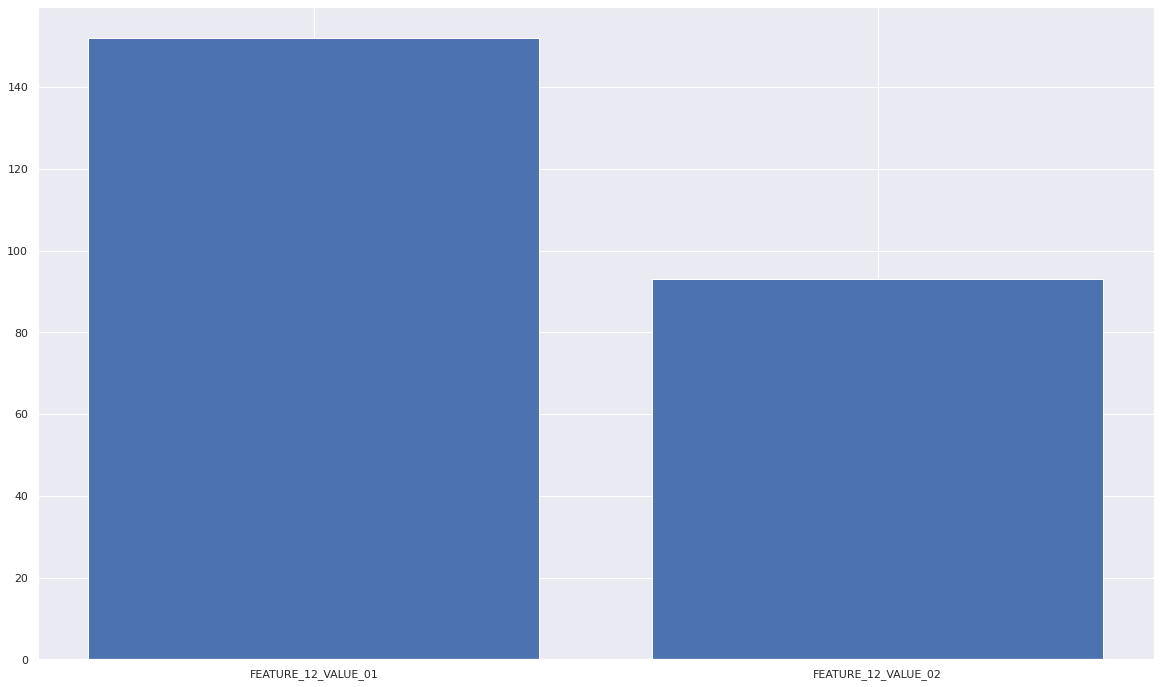

In [14]:
plt.figure(figsize=(20,12))
plt.bar(f12_counts.index, height=f12_counts)
plt.show()

In [15]:
lja_dummy_df = pd.get_dummies(lja_df, columns=['feature_01', 'feature_05', 'feature_11', 'feature_12'])

In [16]:
lja_dummy_df

,cod_loja,cod_ap,cod_municipio,feature_02,feature_03,feature_04,feature_06,feature_07,feature_08,feature_09,...,feature_05_FEATURE_05_VALUE_08,feature_11_FEATURE_11_VALUE_01,feature_11_FEATURE_11_VALUE_02,feature_11_FEATURE_11_VALUE_03,feature_11_FEATURE_11_VALUE_04,feature_11_FEATURE_11_VALUE_05,feature_11_FEATURE_11_VALUE_06,feature_11_FEATURE_11_VALUE_07,feature_12_FEATURE_12_VALUE_01,feature_12_FEATURE_12_VALUE_02
0,1,4125506005002,4125506,FEATURE_02_VALUE_04,True,21.76,31,0.168922,0.167659,115.958848,...,0,0,0,0,0,0,0,0,0,0
1,2,5300108005004,5300108,FEATURE_02_VALUE_03,True,22.00,27,0.215967,0.197287,1562.674817,...,0,0,0,0,0,0,0,0,0,0
2,3,3550308005052,3550308,FEATURE_02_VALUE_03,True,45.66,6,0.190102,0.179140,5593.905463,...,0,0,0,0,0,0,0,0,0,0
3,4,3145604003002,3145604,FEATURE_02_VALUE_04,False,30.00,3,0.141988,0.143677,12.824022,...,0,0,0,0,0,0,0,0,0,0
4,5,1600303005010,1600303,FEATURE_02_VALUE_02,False,62.49,30,0.107619,0.103083,325.531120,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3682,5105259003002,5105259,FEATURE_02_VALUE_04,False,30.16,5,0.210289,0.167499,36.397933,...,0,0,0,0,0,0,0,0,0,0
3126,3683,2604106003003,2604106,FEATURE_02_VALUE_02,False,38.00,13,0.146264,0.152495,163.567629,...,0,0,0,0,0,0,0,0,0,0
3127,3685,4115804003002,4115804,FEATURE_02_VALUE_04,False,44.04,7,0.226926,0.240253,16.862438,...,0,0,0,0,0,0,0,0,0,0
3128,3686,3509700003001,3509700,FEATURE_02_VALUE_06,False,31.76,4,0.134354,0.136028,20.565405,...,0,0,0,0,0,0,0,0,0,0


In [17]:
pib_df = pd.read_csv(my_dir + "dados_pib.csv")
micro_df = pd.read_csv(my_dir + "dados_ppib_micro.csv")
meso_df = pd.read_csv(my_dir + "dados_ppib_meso.csv")
uf_df = pd.read_csv(my_dir + "dados_ppib_uf.csv")
imp_df = pd.read_csv(my_dir + "impostos.csv")

pib_df = pib_df.merge(micro_df)
pib_df = pib_df.merge(meso_df)
pib_df = pib_df.merge(uf_df)
pib_df = pib_df.merge(imp_df)
pib_df.drop(columns=['nome_mun'], inplace=True)

pib_df.head()

,cod_mun,pib,pct_micro,pct_meso,pct_uf,impostos_liq
0,1100015,498864,9.08,2.15,1.15,28793
1,1100023,2296074,59.04,9.90,5.28,232012
2,1100031,138894,10.24,0.60,0.32,5494
3,1100049,2127523,38.73,9.17,4.89,217835
4,1100056,448524,33.06,1.93,1.03,63713


In [18]:
lja_pib_df = lja_df.merge(pib_df, how='left', left_on='cod_municipio', right_on='cod_mun')
lja_pib_df

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_15,feature_16,feature_17,feature_18,cod_mun,pib,pct_micro,pct_meso,pct_uf,impostos_liq
0,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.168922,...,NaN,NaN,NaN,NaN,4125506.0,22581192.0,14.99,13.36,5.36,5739605.0
1,2,5300108005004,5300108,NaN,FEATURE_02_VALUE_03,True,22.00,FEATURE_05_VALUE_03,27,0.215967,...,NaN,NaN,NaN,NaN,5300108.0,244682756.0,100.00,100.00,100.00,29120429.0
2,3,3550308005052,3550308,NaN,FEATURE_02_VALUE_03,True,45.66,FEATURE_05_VALUE_03,6,0.190102,...,NaN,NaN,NaN,NaN,3550308.0,699288352.0,85.50,58.39,32.99,122526246.0
3,4,3145604003002,3145604,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,3,0.141988,...,NaN,NaN,NaN,NaN,3145604.0,848005.0,35.87,3.33,0.15,84817.0
4,5,1600303005010,1600303,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,62.49,FEATURE_05_VALUE_03,30,0.107619,...,100.0,100.0,88.5,93.8,1600303.0,9994877.0,75.56,68.90,64.57,763352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3682,5105259003002,5105259,NaN,FEATURE_02_VALUE_04,False,30.16,FEATURE_05_VALUE_03,5,0.210289,...,100.0,100.0,97.1,97.6,5105259.0,3720050.0,23.15,7.86,2.93,439998.0
3126,3683,2604106003003,2604106,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,38.00,FEATURE_05_VALUE_03,13,0.146264,...,100.0,100.0,50.7,72.5,2604106.0,6877208.0,49.02,23.16,3.79,860942.0
3127,3685,4115804003002,4115804,NaN,FEATURE_02_VALUE_04,False,44.04,FEATURE_05_VALUE_02,7,0.226926,...,100.0,100.0,99.0,95.2,4115804.0,1822777.0,9.44,3.42,0.43,231115.0
3128,3686,3509700003001,3509700,NaN,FEATURE_02_VALUE_06,False,31.76,FEATURE_05_VALUE_03,4,0.134354,...,NaN,NaN,NaN,NaN,3509700.0,1195551.0,76.84,1.08,0.06,73511.0


In [19]:
pop_df = pd.read_csv("./data/dados_pop.csv")

In [20]:
lja_pop_df = lja_df.merge(pop_df, how='left', on='cod_municipio')

In [21]:
lja_pop_df['prop_homens'] = lja_pop_df.Homens / lja_pop_df.Total
lja_pop_df['prop_mulheres'] = lja_pop_df.Mulheres / lja_pop_df.Total
lja_pop_df.drop(columns=['Homens', 'Mulheres'], inplace=True)
lja_pop_df.head()

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_15,feature_16,feature_17,feature_18,Município,Idade,Condição no domicílio e o compartilhamento da responsabilidade pelo domicílio,Total,prop_homens,prop_mulheres
0,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.168922,...,NaN,NaN,NaN,NaN,São José dos Pinhais (PR),Total,Total,264210.0,0.494292,0.505708
1,2,5300108005004,5300108,NaN,FEATURE_02_VALUE_03,True,22.00,FEATURE_05_VALUE_03,27,0.215967,...,NaN,NaN,NaN,NaN,Brasília (DF),Total,Total,2570160.0,0.478134,0.521866
2,3,3550308005052,3550308,NaN,FEATURE_02_VALUE_03,True,45.66,FEATURE_05_VALUE_03,6,0.190102,...,NaN,NaN,NaN,NaN,São Paulo (SP),Total,Total,11253503.0,0.473509,0.526491
3,4,3145604003002,3145604,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,3,0.141988,...,NaN,NaN,NaN,NaN,Oliveira (MG),Total,Total,39466.0,0.489155,0.510845
4,5,1600303005010,1600303,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,62.49,FEATURE_05_VALUE_03,30,0.107619,...,100.0,100.0,88.5,93.8,Macapá (AP),Total,Total,398204.0,0.491238,0.508762


In [22]:
def quick_corr(df, rel_cols):
    ljs_corr = df.corr()
    del_cols = ljs_corr.columns[~ljs_corr.columns.isin(rel_cols)].values
    ljs_corr.drop(columns=del_cols, inplace=True)
    plt.figure(figsize=(15,15))
    sns.heatmap(ljs_corr, annot=True, cmap='viridis');

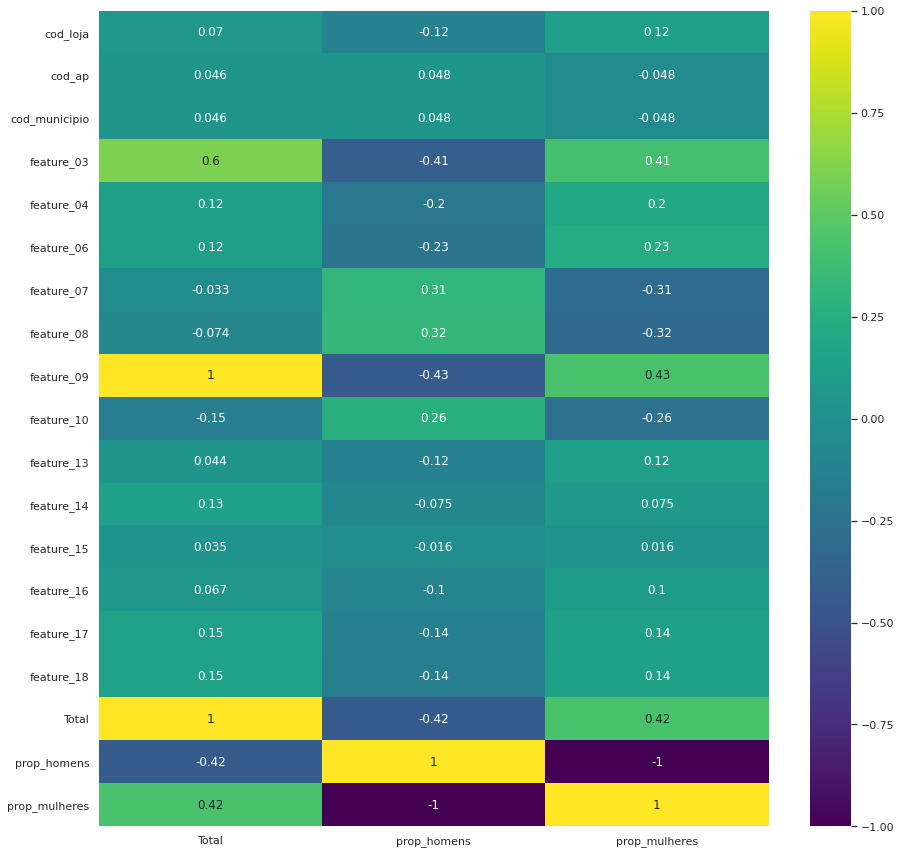

In [23]:
quick_corr(lja_pop_df, ['pib', 'pct_micro', 'impostos_liq', 'Total', 'prop_homens', 'prop_mulheres'])

In [34]:
lja_pop_df[['feature_09', 'Total', 'pib']]

,feature_09,Total,pib
0,115.958848,264210.0,22581192.0
1,1562.674817,2570160.0,244682756.0
2,5593.905463,11253503.0,699288352.0
3,12.824022,39466.0,848005.0
4,325.531120,398204.0,9994877.0
...,...,...,...
3125,36.397933,45556.0,3720050.0
3126,163.567629,314912.0,6877208.0
3127,16.862438,41817.0,1822777.0
3128,20.565405,47789.0,1195551.0


In [24]:
lja_pop_df

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_15,feature_16,feature_17,feature_18,Município,Idade,Condição no domicílio e o compartilhamento da responsabilidade pelo domicílio,Total,prop_homens,prop_mulheres
0,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.168922,...,NaN,NaN,NaN,NaN,São José dos Pinhais (PR),Total,Total,264210.0,0.494292,0.505708
1,2,5300108005004,5300108,NaN,FEATURE_02_VALUE_03,True,22.00,FEATURE_05_VALUE_03,27,0.215967,...,NaN,NaN,NaN,NaN,Brasília (DF),Total,Total,2570160.0,0.478134,0.521866
2,3,3550308005052,3550308,NaN,FEATURE_02_VALUE_03,True,45.66,FEATURE_05_VALUE_03,6,0.190102,...,NaN,NaN,NaN,NaN,São Paulo (SP),Total,Total,11253503.0,0.473509,0.526491
3,4,3145604003002,3145604,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,3,0.141988,...,NaN,NaN,NaN,NaN,Oliveira (MG),Total,Total,39466.0,0.489155,0.510845
4,5,1600303005010,1600303,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,62.49,FEATURE_05_VALUE_03,30,0.107619,...,100.0,100.0,88.5,93.8,Macapá (AP),Total,Total,398204.0,0.491238,0.508762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3682,5105259003002,5105259,NaN,FEATURE_02_VALUE_04,False,30.16,FEATURE_05_VALUE_03,5,0.210289,...,100.0,100.0,97.1,97.6,Lucas do Rio Verde (MT),Total,Total,45556.0,0.527175,0.472825
3126,3683,2604106003003,2604106,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,38.00,FEATURE_05_VALUE_03,13,0.146264,...,100.0,100.0,50.7,72.5,Caruaru (PE),Total,Total,314912.0,0.473634,0.526366
3127,3685,4115804003002,4115804,NaN,FEATURE_02_VALUE_04,False,44.04,FEATURE_05_VALUE_02,7,0.226926,...,100.0,100.0,99.0,95.2,Medianeira (PR),Total,Total,41817.0,0.491833,0.508167
3128,3686,3509700003001,3509700,NaN,FEATURE_02_VALUE_06,False,31.76,FEATURE_05_VALUE_03,4,0.134354,...,NaN,NaN,NaN,NaN,Campos do Jordão (SP),Total,Total,47789.0,0.489506,0.510494


In [11]:
pop_id_df = pd.read_csv(my_dir + "dados_popidade.csv")

In [18]:
pop_id_df.Idade.unique()

array(['Total', '0 a 4 anos', '5 a 9 anos', '10 a 14 anos',
       '15 a 17 anos', '18 ou 19 anos', '20 a 24 anos', '25 a 29 anos',
       '30 a 34 anos', '35 a 39 anos', '40 a 44 anos', '45 a 49 anos',
       '50 a 54 anos', '55 a 59 anos'], dtype=object)

In [37]:
jovem_df = pop_id_df[pop_id_df.Idade == '0 a 4 anos'][['cod_municipio','Total']].rename(columns={'Total':'t1'})
k2_df = pop_id_df[pop_id_df.Idade == '5 a 9 anos'][['cod_municipio','Total']].rename(columns={'Total':'t2'})
k3_df = pop_id_df[pop_id_df.Idade == '10 a 14 anos'][['cod_municipio','Total']].rename(columns={'Total':'t3'})
k4_df = pop_id_df[pop_id_df.Idade == '15 a 17 anos'][['cod_municipio','Total']].rename(columns={'Total':'t4'})
jovem_df = jovem_df.merge(k2_df, on='cod_municipio')
jovem_df = jovem_df.merge(k3_df, on='cod_municipio')
jovem_df = jovem_df.merge(k4_df, on='cod_municipio')
jovem_df['jov_total'] = jovem_df.t1 + jovem_df.t2 + jovem_df.t3 + jovem_df.t4
jovem_df.drop(columns=['t1','t2','t3','t4'], inplace=True)

In [38]:
jv_ad_df = pop_id_df[pop_id_df.Idade == '18 ou 19 anos'][['cod_municipio','Total']].rename(columns={'Total':'t1'})
k2_df = pop_id_df[pop_id_df.Idade == '20 a 24 anos'][['cod_municipio','Total']].rename(columns={'Total':'t2'})
k3_df = pop_id_df[pop_id_df.Idade == '25 a 29 anos'][['cod_municipio','Total']].rename(columns={'Total':'t3'})
jv_ad_df = jv_ad_df.merge(k2_df, on='cod_municipio')
jv_ad_df = jv_ad_df.merge(k3_df, on='cod_municipio')
jv_ad_df['jv_ad_total'] = jv_ad_df.t1 + jv_ad_df.t2 + jv_ad_df.t3
jv_ad_df.drop(columns=['t1','t2','t3'], inplace=True)

In [39]:
adulto_df = pop_id_df[pop_id_df.Idade == '30 a 34 anos'][['cod_municipio','Total']].rename(columns={'Total':'t1'})
k2_df = pop_id_df[pop_id_df.Idade == '35 a 39 anos'][['cod_municipio','Total']].rename(columns={'Total':'t2'})
k3_df = pop_id_df[pop_id_df.Idade == '40 a 44 anos'][['cod_municipio','Total']].rename(columns={'Total':'t3'})
k4_df = pop_id_df[pop_id_df.Idade == '45 a 49 anos'][['cod_municipio','Total']].rename(columns={'Total':'t4'})
k5_df = pop_id_df[pop_id_df.Idade == '50 a 54 anos'][['cod_municipio','Total']].rename(columns={'Total':'t5'})
k6_df = pop_id_df[pop_id_df.Idade == '55 a 59 anos'][['cod_municipio','Total']].rename(columns={'Total':'t6'})
adulto_df = adulto_df.merge(k2_df, on='cod_municipio')
adulto_df = adulto_df.merge(k3_df, on='cod_municipio')
adulto_df = adulto_df.merge(k4_df, on='cod_municipio')
adulto_df = adulto_df.merge(k5_df, on='cod_municipio')
adulto_df = adulto_df.merge(k6_df, on='cod_municipio')
adulto_df['ad_total'] = adulto_df.t1 + adulto_df.t2 + adulto_df.t3 + adulto_df.t4 + adulto_df.t5 + adulto_df.t6
adulto_df.drop(columns=['t1','t2','t3','t4','t5','t6'], inplace=True)
del(k2_df)
del(k3_df)
del(k4_df)
del(k5_df)
del(k6_df)

In [50]:
lja_pop_df = lja_pop_df.merge(jovem_df, on='cod_municipio', how='left')
lja_pop_df = lja_pop_df.merge(jv_ad_df, on='cod_municipio', how='left')
lja_pop_df = lja_pop_df.merge(adulto_df, on='cod_municipio', how='left')

In [52]:
lja_pop_df['prop_jov'] = lja_pop_df.jov_total / lja_pop_df.Total
lja_pop_df['prop_jadulto'] = lja_pop_df.jv_ad_total / lja_pop_df.Total
lja_pop_df['prop_adulto'] = lja_pop_df.ad_total / lja_pop_df.Total

In [53]:
lja_pop_df

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,Município,Idade,Condição no domicílio e o compartilhamento da responsabilidade pelo domicílio,Total,jov_total,jv_ad_total,ad_total,prop_jov,prop_jadulto,prop_adulto
0,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.168922,...,São José dos Pinhais (PR),Total,Total,264210.0,80694.0,58234.0,105730.0,0.305416,0.220408,0.400174
1,2,5300108005004,5300108,NaN,FEATURE_02_VALUE_03,True,22.00,FEATURE_05_VALUE_03,27,0.215967,...,Brasília (DF),Total,Total,2570160.0,740095.0,603368.0,1029084.0,0.287957,0.234759,0.400397
2,3,3550308005052,3550308,NaN,FEATURE_02_VALUE_03,True,45.66,FEATURE_05_VALUE_03,6,0.190102,...,São Paulo (SP),Total,Total,11253503.0,2842414.0,2402721.0,4670230.0,0.252580,0.213509,0.415002
3,4,3145604003002,3145604,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,3,0.141988,...,Oliveira (MG),Total,Total,39466.0,10294.0,7619.0,16287.0,0.260832,0.193052,0.412684
4,5,1600303005010,1600303,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,62.49,FEATURE_05_VALUE_03,30,0.107619,...,Macapá (AP),Total,Total,398204.0,150506.0,98006.0,129184.0,0.377962,0.246120,0.324417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3682,5105259003002,5105259,NaN,FEATURE_02_VALUE_04,False,30.16,FEATURE_05_VALUE_03,5,0.210289,...,Lucas do Rio Verde (MT),Total,Total,45556.0,13954.0,13317.0,16586.0,0.306304,0.292322,0.364079
3126,3683,2604106003003,2604106,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,38.00,FEATURE_05_VALUE_03,13,0.146264,...,Caruaru (PE),Total,Total,314912.0,95407.0,72504.0,115365.0,0.302964,0.230236,0.366340
3127,3685,4115804003002,4115804,NaN,FEATURE_02_VALUE_04,False,44.04,FEATURE_05_VALUE_02,7,0.226926,...,Medianeira (PR),Total,Total,41817.0,11489.0,9054.0,16939.0,0.274745,0.216515,0.405074
3128,3686,3509700003001,3509700,NaN,FEATURE_02_VALUE_06,False,31.76,FEATURE_05_VALUE_03,4,0.134354,...,Campos do Jordão (SP),Total,Total,47789.0,14171.0,9957.0,19331.0,0.296533,0.208353,0.404507


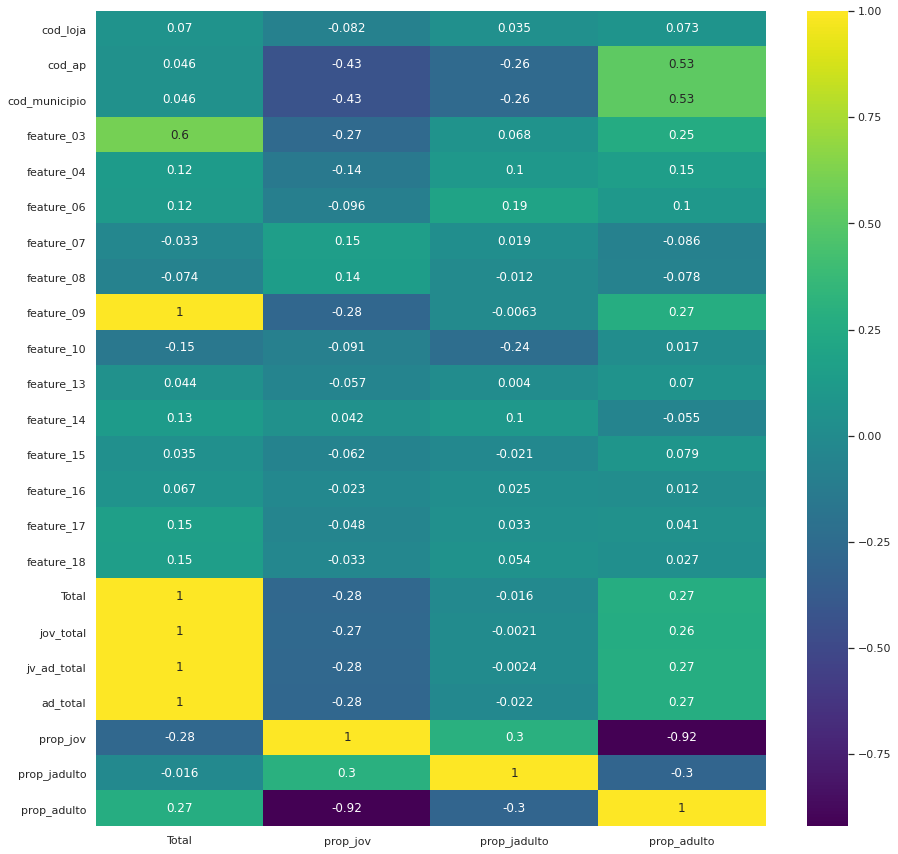

In [58]:
quick_corr(lja_pop_df, rel_cols = ['Total', 'prop_jov', 'prop_jadulto', 'prop_adulto'])